In [1]:
%matplotlib inline
import plotting_Boyle as plt_B
reload(plt_B)
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');

current_colors = sns.color_palette()
import sys 
sys.path.append('../code_general/')
from read_model_ID import unpack_parameters
import CRISPR_free_energy_landscape as FreeEnergy
reload(FreeEnergy);
import plotting_Boyle as plt_B
reload(plt_B)
import CRISPR_dCas9_binding_curve_Boyle as dCas9
reload(dCas9);

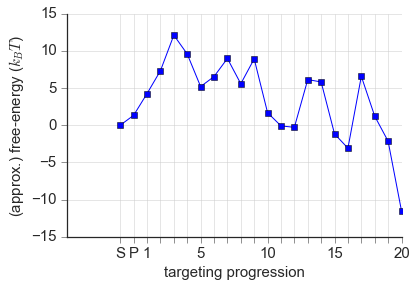

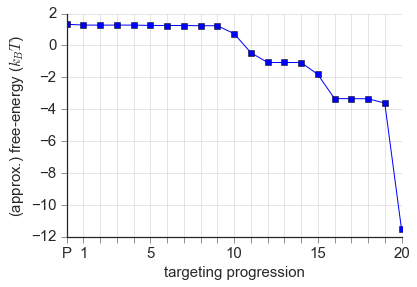

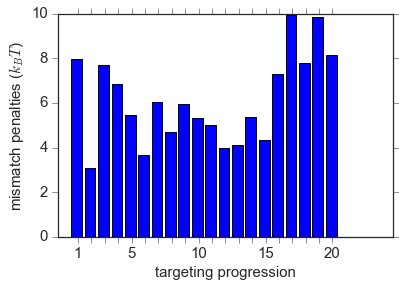

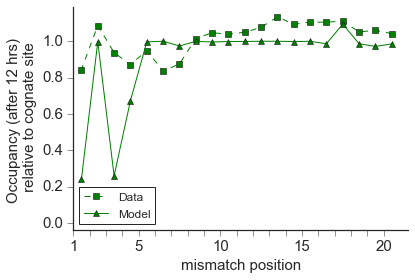

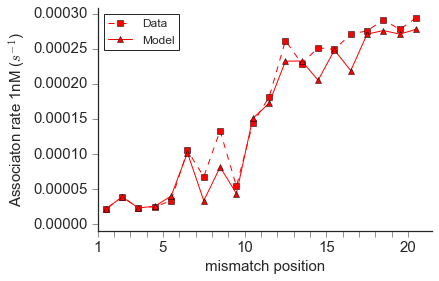

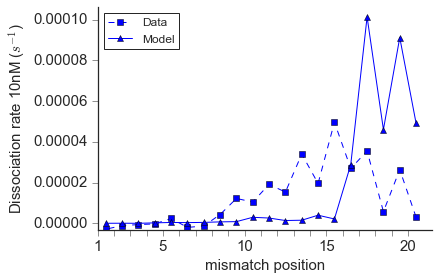

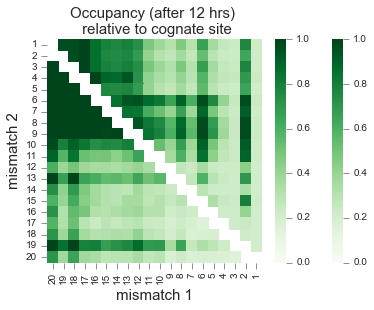

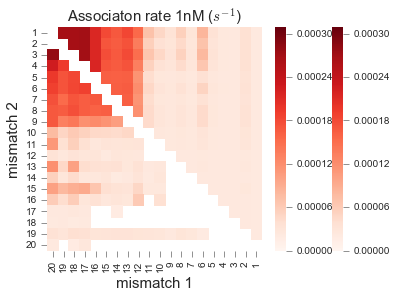

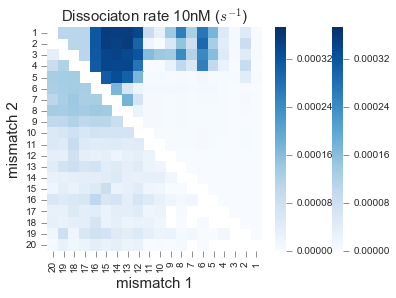

In [2]:
reload(plt_B)
reload(FreeEnergy)

model_id = 'init_limit_general_energies_v2'
filename = '../data/13_9_2018/fit_13_9_2018_sim_V.txt'
Nparams = 44
parameters = plt_B.load_simm_anneal(filename, Nparams)

# parameters[:21] = 0.0


Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)

# Energy_landscape = FreeEnergy.plot_landscape(parameters, model_id)
# plt.savefig('../reports/fig32_10_10_2018.pdf',format='pdf',bbox_inches='tight');
Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id);
# plt.savefig('../reports/fig40_10_10_2018.pdf',format='pdf',bbox_inches='tight');


plt.figure()
FreeEnergy.plot_mismatch_penalties(parameters, model_id)
# plt.savefig('../reports/fig33_10_10_2018.pdf',format='pdf',bbox_inches='tight');



plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
# plt.savefig('../reports/fig34_10_10_2018.pdf',format='pdf',bbox_inches='tight');


plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
# plt.savefig('../reports/fig35_10_10_2018.pdf',format='pdf',bbox_inches='tight');

plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')
# plt.savefig('../reports/fig36_10_10_2018.pdf',format='pdf',bbox_inches='tight');

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
# plt.savefig('../reports/fig37_10_10_2018.pdf',format='pdf',bbox_inches='tight');

plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
# plt.savefig('../reports/fig38_10_10_2018.pdf',format='pdf',bbox_inches='tight');

plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')
# plt.savefig('../reports/fig39_10_10_2018.pdf',format='pdf',bbox_inches='tight');

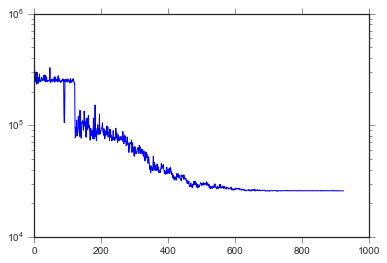

In [3]:
fit = pd.read_csv(filename, delimiter='\t', index_col=Nparams+2)
fit = fit.reset_index()
plt.semilogy(fit.Potential)

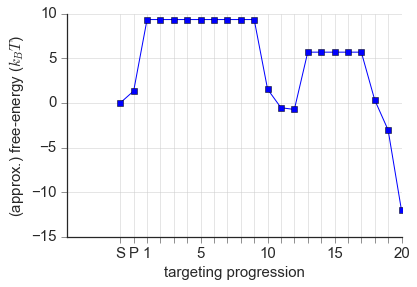

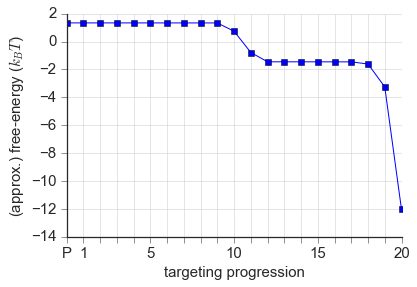

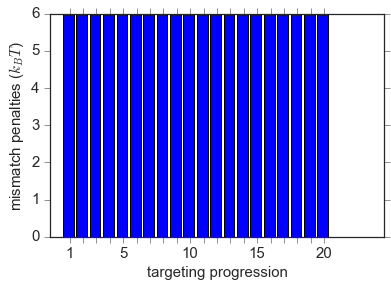

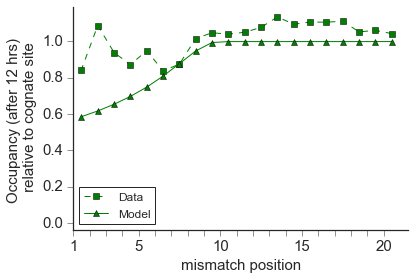

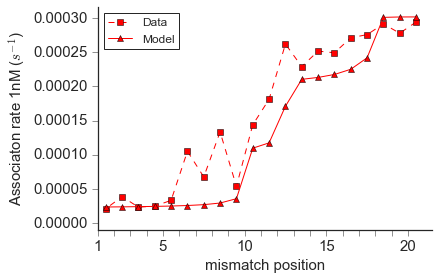

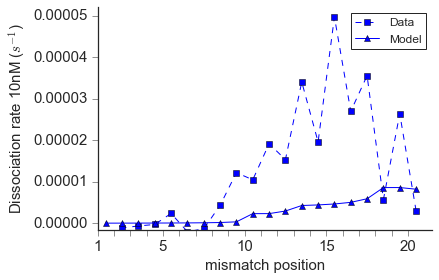

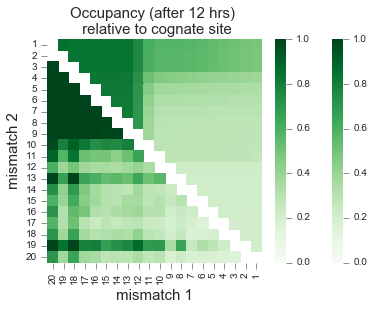

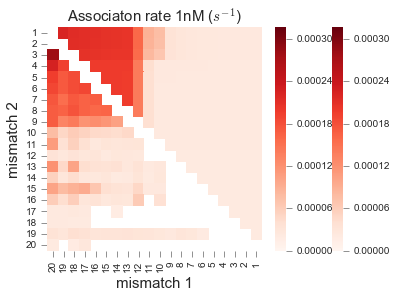

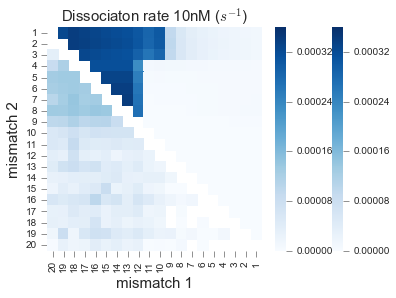

In [4]:
new_parameters = parameters.copy()
new_parameters[1] = -8.0
new_parameters[2:10] = 0.0
new_parameters[14:18] = 0.0
new_parameters[10] = 7.8;
new_parameters[11] = new_parameters[11] +0.3
new_parameters[20] = 9.0
new_parameters[21:42] = 6.0;
new_parameters[-3] = 4.0;
new_parameters[-2] = new_parameters[-2]-0.8

#AbsOcc_model, Asso_model, Disso_model = dCas9.calc_Boyle(True, True, True, new_parameters, 
#                                                         [], 20, model_id)

Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(new_parameters,model_id);

plt.figure()
_ = FreeEnergy.plot_mismatch_penalties(new_parameters, model_id)

Model_pbound, Model_on, Model_off = plt_B.calc_predictions(new_parameters,model_id)

plt.figure()
plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')
# plt.savefig('../reports/fig34_10_10_2018.pdf',format='pdf',bbox_inches='tight');


plt.figure()
plt_B.plot_single_mismatches(Model_on ,kind='OnRate')
# plt.savefig('../reports/fig35_10_10_2018.pdf',format='pdf',bbox_inches='tight');

plt.figure()
plt_B.plot_single_mismatches(Model_off ,kind='OffRate')
# plt.savefig('../reports/fig36_10_10_2018.pdf',format='pdf',bbox_inches='tight');

plt.figure()
plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')
# plt.savefig('../reports/fig37_10_10_2018.pdf',format='pdf',bbox_inches='tight');

plt.figure()
plt_B.plot_heatmap(Model_on ,kind='OnRate')
# plt.savefig('../reports/fig38_10_10_2018.pdf',format='pdf',bbox_inches='tight');

plt.figure()
plt_B.plot_heatmap(Model_off ,kind='OffRate')
# plt.savefig('../reports/fig39_10_10_2018.pdf',format='pdf',bbox_inches='tight');


# Compare to Ilya's data 

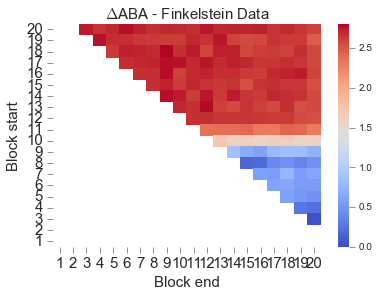

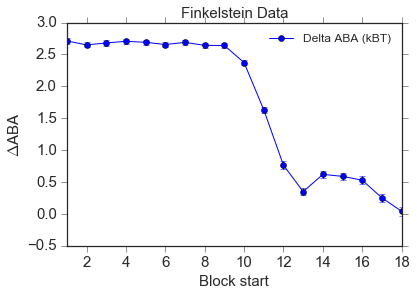

In [5]:
sys.path.append('../code_ABA_Finkelsteinlab/')
import plotting_ABA as pltABA
reload(pltABA);


IlyaData = pd.read_csv('../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv')

BlockMismatches, _,ABA_first_mm_pos = pltABA.plot_block_mm_ABA(IlyaData, 
                                                               SaveFigures=True,
                                                               figure_names=['../reports/fig41_10_10_2018.pdf',
                                                                            '../reports/fig42_10_10_2018.pdf']);

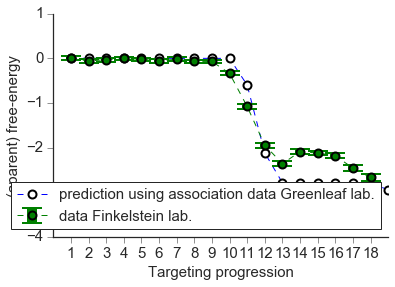

In [6]:
ABA_landscape = ABA_first_mm_pos['Delta ABA (kBT)'] - ABA_first_mm_pos['Delta ABA (kBT)'][0]
FreeEnergy_landscape_shifted = FreeEnergy_landscape - FreeEnergy_landscape[0]


plt.plot(range(1,len(FreeEnergy_landscape_shifted)+1),FreeEnergy_landscape_shifted,
        marker='o',
        markersize=8,
        markerfacecolor='white',
        markeredgewidth=2,
        linestyle='dashed',
        label='prediction using association data Greenleaf lab.')
plt.errorbar(range(1,len(ABA_landscape)+1),ABA_landscape,
        yerr=np.array(ABA_first_mm_pos['Uncertainty']),
        elinewidth=10,
        capsize=10,
        marker='o',
        markersize=8,
        markerfacecolor='g',
        markeredgewidth=2,
        linestyle='dashed',
        label='data Finkelstein lab.')
plt.xlim(0,19);
plt.ylim(-4.0,1.0);
plt.xticks(range(1,19),fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('(aparent) free-energy',fontsize=15)
plt.legend(loc='best',frameon=True,fontsize=15);
sns.despine();
#plt.savefig('../reports/fig42_10_10_2018.pdf',format='pdf',bbox_inches='tight');

In [7]:
rate_sol_to_PAM = 10**parameters[-3]
rate_PAM_to_R1  = 10**parameters[-2]
rate_internal = 10**parameters[-1]


rate_PAM_to_sol = rate_sol_to_PAM * np.exp(parameters[0])



print rate_sol_to_PAM , rate_PAM_to_sol 
print rate_PAM_to_R1
print rate_internal


0.674063091656 2.55729501317
0.170113460779
790.655331483


In [8]:
def get_pos(s):
    if s == 'WT':
        return([])
    s2 = s.split(':')
    return map(lambda x: 20-int(x[:-1]), s2)

def find_PAM_mutations(x):
    return (np.array(x)<=0).any()

def string_get_pos(x):
    s = ''
    for pos in x:
        s += str(pos) + 'X:'
    if len(x)==0:
        s='WT:'
    return s[:-1]

def get_pos_again(s):
    if s == 'WT':
        return([])
    s2 = s.split(':')
    return np.array(map(lambda x: int(x[:-1]), s2)).astype('int')

def remove_NaN(x):
    return np.array(x)[np.where(np.isnan(x)==False)[0]]

In [9]:
replica = '1'
path = '../Data_Boyle/'

occ = pd.read_csv(path + 'occupancy_rep' + str(replica) + '_processed_with_errors.txt')
kon = pd.read_csv(path + 'second_fit_data.summarized.on.1nM.rep' + str(replica) + '.txt', delimiter='\t')
koff = pd.read_csv(path + 'second_fit_data.summarized.off.10nM.rep' + str(replica) + '.txt', delimiter='\t')
kon = kon[['mutations', 'slope', 'se']]
koff = koff[['mutations', 'slope', 'se']]
occ = occ[['mutations', 'Ratio', 'rel_err_Ratio']]
kon.rename(columns={'slope': 'on_slope'}, inplace=True)
koff.rename(columns={'slope': 'off_slope'}, inplace=True)
occ.rename(columns={'Ratio': 'occ'}, inplace=True)
kon.rename(columns={'se': 'on_error'}, inplace=True)
koff.rename(columns={'se': 'off_error'}, inplace=True)
occ.rename(columns={'rel_err_Ratio': 'occ_error'}, inplace=True)
koff['off_slope'] *= -1
Full_data = kon.copy()
Full_data = Full_data.merge(koff, how='outer', on='mutations')
Full_data = Full_data.merge(occ, how='outer', on='mutations')
Full_data['MM_pos'] = Full_data['mutations'].apply(get_pos)
Full_data['PAM_mut'] = Full_data['MM_pos'].apply(find_PAM_mutations)
Full_data['mm_ID'] = Full_data['MM_pos'].apply(string_get_pos)
no_PAM = Full_data[Full_data.PAM_mut == False]
Combined_Data = no_PAM[['mm_ID', 'occ', 'on_slope', 'off_slope', 'on_error', 'off_error', 'occ_error']]
Combined_Data = Combined_Data.groupby('mm_ID').agg(lambda x: list(x))
Combined_Data = Combined_Data.reset_index()
Combined_Data['MM_pos'] = Combined_Data['mm_ID'].apply(get_pos_again)
Combined_Data = Combined_Data[['MM_pos', 'occ', 'on_slope', 'off_slope', 'on_error', 'off_error', 'occ_error']]
Combined_Data['occ'] = Combined_Data['occ'].apply(remove_NaN)
Combined_Data['on_slope'] = Combined_Data['on_slope'].apply(remove_NaN)
Combined_Data['off_slope'] = Combined_Data['off_slope'].apply(remove_NaN)
Combined_Data['occ_error'] = Combined_Data['occ_error'].apply(remove_NaN)
Combined_Data['on_error'] = Combined_Data['on_error'].apply(remove_NaN)
Combined_Data['off_error'] = Combined_Data['off_error'].apply(remove_NaN)

In [10]:
prediction = Combined_Data['MM_pos'].apply(lambda x: dCas9.calc_Boyle(CalcOccupancy = True, 
                              CalcOffRate = True, 
                              CalcOnRate = True, 
                              parameters = new_parameters, 
                              mismatch_positions = x, 
                              guide_length=20, 
                              model_id=model_id)                                          
                                          )




In [11]:
def split_occ(row):
    occ  = row[0]
    return occ 

def split_asso(row):
    asso = row[1]
    return asso

def split_disso(row):
    disso = row[2]
    return disso 

Combined_Data['theory_occ'] = prediction.apply(split_occ)
Combined_Data['theory_on'] = prediction.apply(split_asso)
Combined_Data['theory_off'] = prediction.apply(split_disso)

C:\Users\behro\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


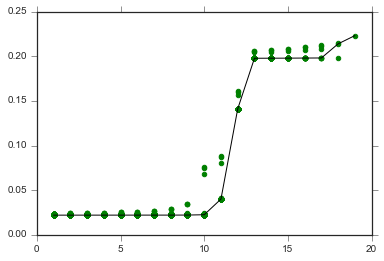

In [12]:
def get_first_mm_pos(x):
    return min(x)




MultipleMM = Combined_Data[Combined_Data['MM_pos'].apply(len)>1]
first_mm_pos = MultipleMM['MM_pos'].apply(get_first_mm_pos)
MultipleMM['first_mm_pos'] = first_mm_pos







plt.scatter(MultipleMM['first_mm_pos'], MultipleMM['theory_on']*1000, color = 'g')

plt.plot(range(1,20), MultipleMM.groupby('first_mm_pos')['theory_on'].median()*1000, color='black')
# plt.savefig('../reports/fig31_10_10_2018.pdf',format='pdf',bbox_inches='tight');

In [13]:
def find_mut_pos(mutation):
    mut_list = mutation.split(':')
    return np.array(map(lambda x: 20-int(x[:-1]), mut_list))

def extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color, show_plot=True):
    data = Boyle_data.copy()
    data= data[data['seq'].apply(lambda x: x[-2:]=='GG')]
    data = data[data['nmut']>0]
    data.drop(['p5', 'p95', 'seq', 'series', 'count', 'se', 'nmut'], axis=1, inplace=True)
    data['MM_pos'] = data['mutations'].apply(find_mut_pos)
    data['MM_pos'] = data['MM_pos'].apply(lambda x: list(x[x>0]))
    data['nmut'] = data['MM_pos'].apply(len)        
    data = data[(data['nmut']>=nmut_min)&(data['nmut']<=nmut_max)]
    data['1st_MM_pos'] = data['MM_pos'].apply(lambda x: x[-1])
    data['MM_dist'] = data['MM_pos'].apply(lambda x: np.abs(np.diff(np.array(x))))
    if consecuitive:
        data = data[data['MM_dist'].apply(lambda x: np.all(x==1))]
    data.drop(['MM_pos','mutations','nmut','MM_dist'], axis=1, inplace=True)
    data.sort_values(by='1st_MM_pos',inplace=True)
    data.reset_index(inplace=True,drop=True)
    data = data[['1st_MM_pos', col_name]]
    data_med = data.groupby('1st_MM_pos').median()
    data_med.reset_index(inplace=True)
    
    if show_plot:
        plt.plot(data['1st_MM_pos'], data[col_name], 'o', color=color)
        plt.plot(data_med['1st_MM_pos'], data_med[col_name], 'o-',color='k')
        plt.xlabel('1st mismatch position', fontsize=15)
        plt.ylabel(col_name, fontsize=15)
        plt.xticks(range(1,21),fontsize=15);
        plt.yticks(fontsize=15);
        title = 'nmut_min = '+str(nmut_min)+'   '+'nmut_max = '+str(nmut_max)
        if consecuitive:
            title = title + '   consecuitive'
        plt.title(title, fontsize=15)
    
    return data_med, data


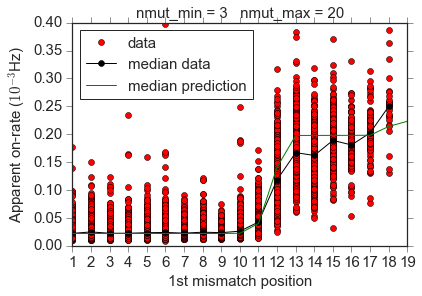

In [14]:
on_data = pd.read_csv('../Data_Boyle/second_fit_data.summarized.on.1nM.rep1.txt',delimiter='\t')
on_data['slope'] = 1000*on_data['slope']
on_data['se'] = 1000*on_data['se']
on_data.rename(columns={'slope': 'Apparent on-rate ($10^{-3}$Hz)'}, inplace=True)

Boyle_data = on_data
col_name = 'Apparent on-rate ($10^{-3}$Hz)'
nmut_min = 3
nmut_max = 20
consecuitive = False
color = 'r'
on_data_med_1MM,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)




plt.plot(range(1,20), MultipleMM.groupby('first_mm_pos')['theory_on'].median()*1000, color='green')
plt.ylim(0,0.4);


plt.legend(['data','median data','median prediction'],frameon=True,fontsize=15, loc='best')
#plt.savefig('../reports/fig31_10_10_2018.pdf',format='pdf',bbox_inches='tight');
